In [69]:
# on what interest rate, a loan should be given?

In [70]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
loan = pd.read_csv(r"C:\Users\Nikita\Downloads\LoansData.csv")

In [72]:
loan.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
0,1,20000.0,20000.0,0.09,36,debt_consolidation,0.15,MORTGAGE,6541.67,735.0,14.0,14272.0,2.0
1,2,19200.0,19200.0,0.12,36,debt_consolidation,0.28,MORTGAGE,4583.33,715.0,12.0,11140.0,1.0
2,3,35000.0,35000.0,0.22,60,debt_consolidation,0.24,MORTGAGE,11500.00,690.0,14.0,21977.0,1.0
3,4,10000.0,9975.0,0.10,36,debt_consolidation,0.14,MORTGAGE,3833.33,695.0,10.0,9346.0,0.0
4,5,12000.0,12000.0,0.12,36,credit_card,0.19,RENT,3195.00,695.0,11.0,14469.0,0.0


In [73]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   float64
 4   Loan.Length                     2500 non-null   int64  
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   float64
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   CIBIL_Score                     2498 non-null   float64
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [74]:
loan.dtypes.value_counts()

float64    9
int64      2
object     2
dtype: int64

In [75]:
# Univariate Analysis
loan['Loan.Purpose'].unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [76]:
loan['Loan.Purpose'].nunique()

14

In [77]:
loan['Loan.Purpose'].value_counts() # freq distribution

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

In [78]:
loan['Loan.Purpose'].value_counts(normalize = True) # proportion wise ditribution

debt_consolidation    0.5228
credit_card           0.1776
other                 0.0804
home_improvement      0.0608
major_purchase        0.0404
small_business        0.0348
car                   0.0200
wedding               0.0156
medical               0.0120
moving                0.0116
vacation              0.0084
house                 0.0080
educational           0.0060
renewable_energy      0.0016
Name: Loan.Purpose, dtype: float64

In [79]:
loan['Home.Ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE', nan], dtype=object)

In [80]:
loan['Home.Ownership'].nunique()

5

In [81]:
loan['Home.Ownership'].value_counts(dropna= False) # drop na tells how many missing values

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
NaN            1
Name: Home.Ownership, dtype: int64

In [82]:
loan.isna().sum()

LoanID                            0
Amount.Requested                  1
Amount.Funded.By.Investors        1
Interest.Rate                     2
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              1
Home.Ownership                    1
Monthly.Income                    1
CIBIL_Score                       2
Open.CREDIT.Lines                 3
Revolving.CREDIT.Balance          3
Inquiries.in.the.Last.6.Months    3
dtype: int64

In [83]:
loan.drop(['LoanID'], inplace = True, axis = 1)

In [84]:
# Check outliers
loan.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Amount.Requested,2499.0,12405.462185,7802.933666,1000.00,1500.0000,1900.00,2000.00,2500.00,2867.500,4000.00,6000.0,10000.00,17000.00,24000.00,28000.000,30000.00,30000.0000,35000.00,35000.00,35000.00
Amount.Funded.By.Investors,2499.0,12002.374186,7746.767348,-0.01,998.3456,1400.00,1800.00,2000.00,2200.000,3600.00,6000.0,10000.00,16000.00,23950.00,27925.000,29950.00,30000.0000,33018.00,35000.00,35000.00
Interest.Rate,2498.0,0.130380,0.041289,0.05,0.0600,0.06,0.06,0.07,0.070,0.08,0.1,0.13,0.16,0.19,0.200,0.21,0.2109,0.22,0.23,0.25
Loan.Length,2500.0,41.260800,9.930893,36.00,36.0000,36.00,36.00,36.00,36.000,36.00,36.0,36.00,36.00,60.00,60.000,60.00,60.0000,60.00,60.00,60.00
Debt.To.Income.Ratio,2499.0,0.153854,0.075103,0.00,0.0100,0.02,0.02,0.03,0.030,0.05,0.1,0.15,0.21,0.25,0.280,0.29,0.3000,0.31,0.33,0.35
Monthly.Income,2499.0,5688.931321,3963.118185,588.50,1416.4032,1666.67,1833.33,2000.00,2166.003,2600.00,3500.0,5000.00,6800.00,9297.33,11666.703,12500.00,13390.8012,15000.00,18750.00,102750.00
CIBIL_Score,2498.0,705.904724,35.042199,640.00,660.0000,660.00,660.00,660.00,660.000,665.00,680.0,700.00,725.00,755.00,775.000,780.00,785.0000,795.00,805.00,830.00
Open.CREDIT.Lines,2497.0,10.072887,4.507416,2.00,3.0000,3.00,3.00,4.00,4.000,5.00,7.0,9.00,13.00,16.00,18.000,19.00,20.0000,21.00,23.00,38.00
Revolving.CREDIT.Balance,2497.0,15223.184622,18281.015258,0.00,0.0000,65.24,348.64,679.20,916.200,2298.80,5584.0,10948.00,18861.00,30047.00,40768.400,43744.40,50365.4000,63322.16,92433.64,270800.00
Inquiries.in.the.Last.6.Months,2497.0,0.906688,1.231149,0.00,0.0000,0.00,0.00,0.00,0.000,0.00,0.0,0.00,1.00,3.00,3.000,3.00,4.0000,4.00,5.00,9.00


In [85]:
loan.shape

(2500, 12)

In [86]:
loan.dropna(inplace = True)

In [87]:
loan.shape

(2489, 12)

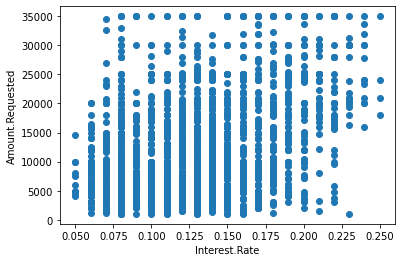

In [88]:
# Bivariate Analysis : CAT-CAT, CAT-NUM, NUM-NUM
# NUM-NUM : Y~X (intrest rate, columns)
plt.scatter(loan['Interest.Rate'], loan['Amount.Requested']) # no main info
plt.xlabel('Interest.Rate')
plt.ylabel('Amount.Requested')
plt.show()

In [89]:
loan[['Interest.Rate','Amount.Requested']].corr()

,Interest.Rate,Amount.Requested
Interest.Rate,1.000000,0.333014
Amount.Requested,0.333014,1.000000


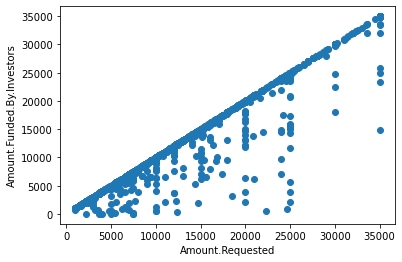

In [90]:
plt.scatter(loan['Amount.Requested'], loan['Amount.Funded.By.Investors']) # positive relationship
plt.xlabel('Amount.Requested') # will keep requested and remove funded col as funded will be future knowledge
plt.ylabel('Amount.Funded.By.Investors')
plt.show()

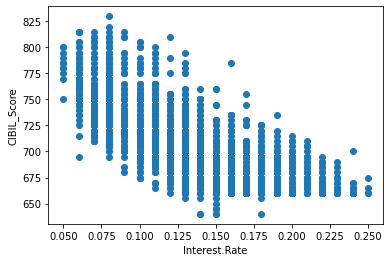

In [91]:
plt.scatter(loan['Interest.Rate'], loan['CIBIL_Score']) # inverse relationship
plt.xlabel('Interest.Rate')
plt.ylabel('CIBIL_Score')
plt.show()

In [92]:
loan[['Interest.Rate','CIBIL_Score']].corr()

,Interest.Rate,CIBIL_Score
Interest.Rate,1.000000,-0.704972
CIBIL_Score,-0.704972,1.000000


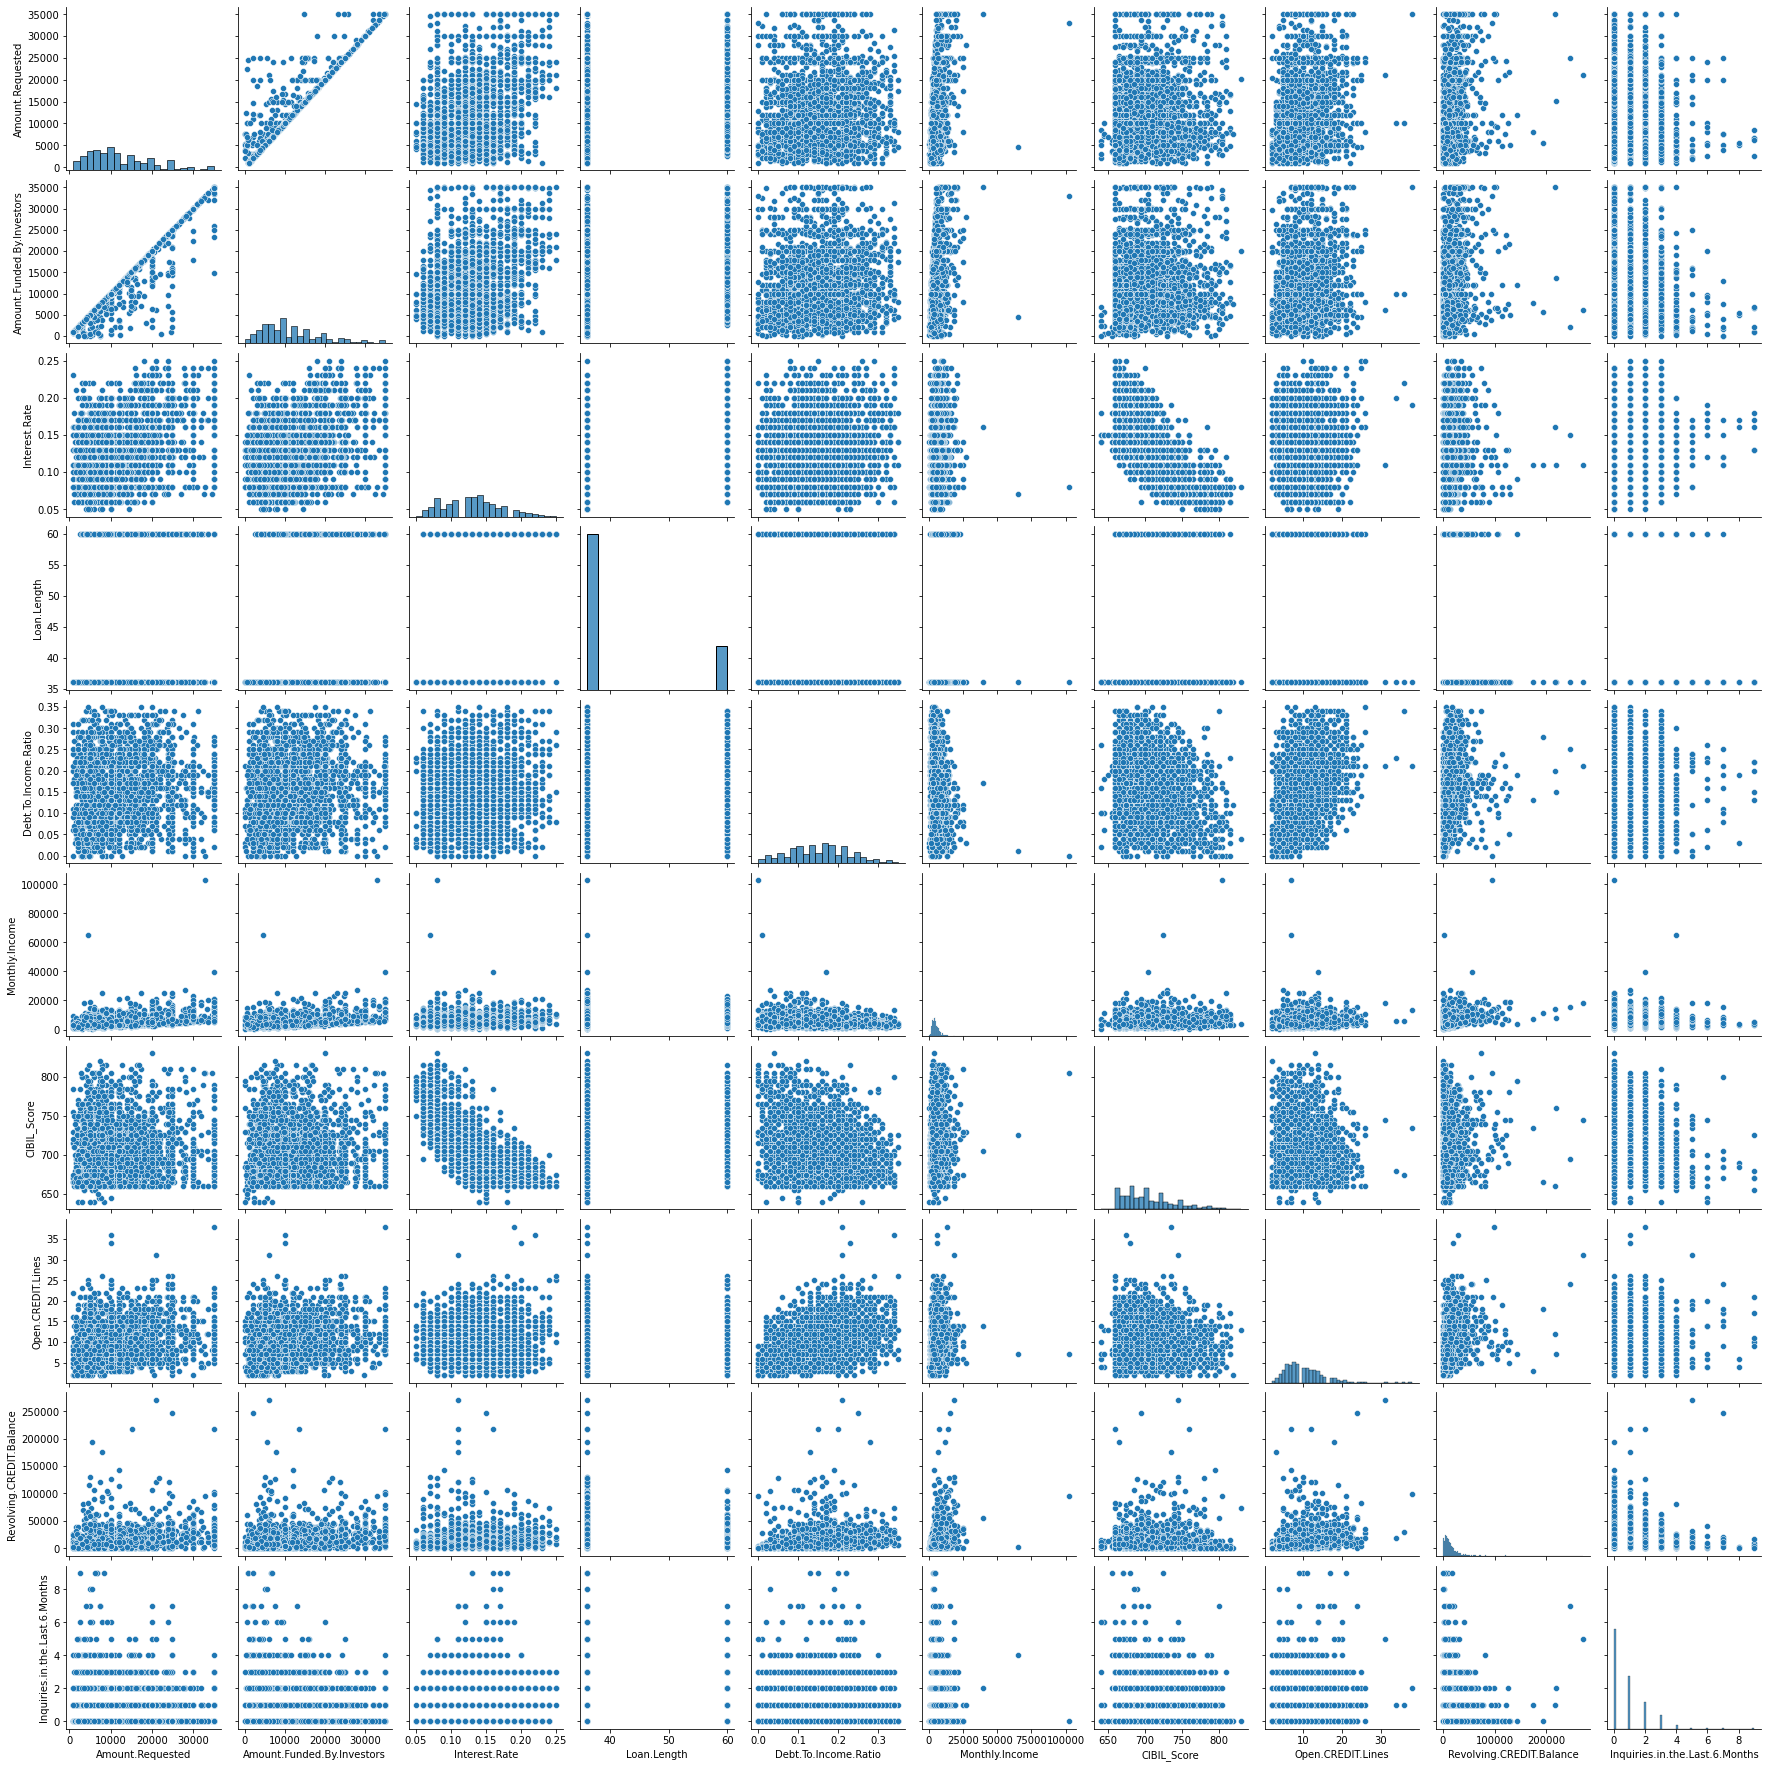

In [93]:
sns.pairplot(loan)

In [94]:
# CAT-NUM : Bar Graph, Pie Graph, Hypothesis Testing( T test, Z test, Anova)

In [95]:
loan.groupby(['Loan.Purpose'])['Amount.Requested'].mean().sort_values(ascending = False)

Loan.Purpose
debt_consolidation    13830.591852
small_business        13238.372093
home_improvement      13029.605263
house                 12888.750000
credit_card           12245.316027
wedding               10915.789474
medical                8710.000000
other                  8583.417085
major_purchase         8187.128713
car                    8167.500000
moving                 7672.413793
vacation               7314.285714
educational            5305.000000
renewable_energy       4525.000000
Name: Amount.Requested, dtype: float64

<AxesSubplot:xlabel='Loan.Purpose'>

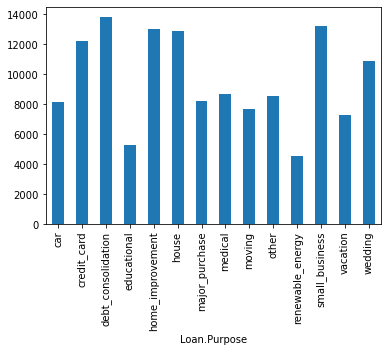

In [96]:
loan.groupby(['Loan.Purpose'])['Amount.Requested'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Loan.Purpose'>

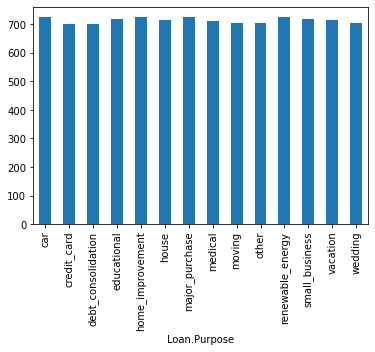

In [97]:
loan.groupby(['Loan.Purpose'])['CIBIL_Score'].mean().plot(kind='bar')

In [98]:
loan.groupby(['Loan.Purpose']).agg({'Interest.Rate' : ['count', 'min', 'max', 'mean'],
                                   'Amount.Requested' : ['min', 'max', 'mean', 'std'],
                                   'CIBIL_Score' : ['min', 'max', 'mean']})

Interest.Rate                       Amount.Requested  \
                           count   min   max      mean              min   
Loan.Purpose                                                              
car                           50  0.06  0.20  0.111200           1700.0   
credit_card                  443  0.05  0.25  0.130000           1125.0   
debt_consolidation          1301  0.06  0.25  0.135557           1000.0   
educational                   15  0.07  0.19  0.111333           1000.0   
home_improvement             152  0.05  0.23  0.115789           1000.0   
house                         20  0.06  0.22  0.134500           3000.0   
major_purchase               101  0.05  0.19  0.108119           1500.0   
medical                       30  0.05  0.23  0.116667           1400.0   
moving                        29  0.06  0.25  0.136552           1000.0   
other                        199  0.06  0.23  0.131910           1000.0   
renewable_energy               4  0.07  0.14  0.097500           1000.0   
small_business                86  0.06  0.22  0.128721           1800.0   
vacation                      21  0.05  0.18  0.120000           1400.0   
wedding                       38  0.05  0.22  0.120000           2000.0   

                                                       CIBIL_Score         \
                        max          mean          std         min    max   
Loan.Purpose                                                                
car                 23000.0   8167.500000  5023.603090       660.0  815.0   
credit_card         35000.0  12245.316027  6813.700126       640.0  810.0   
debt_consolidation  35000.0  13830.591852  7886.357619       640.0  815.0   
educational         12000.0   5305.000000  3290.519390       640.0  805.0   
home_improvement    35000.0  13029.605263  8770.616403       660.0  830.0   
house               35000.0  12888.750000  8464.812908       660.0  810.0   
major_purchase      35000.0   8187.128713  6729.902130       650.0  820.0   
medical             35000.0   8710.000000  6764.657139       655.0  810.0   
moving              32000.0   7672.413793  7079.189651       660.0  785.0   
other               35000.0   8583.417085  6807.854023       645.0  805.0   
renewable_energy     8400.0   4525.000000  3041.244263       665.0  760.0   
small_business      35000.0  13238.372093  8460.257173       660.0  810.0   
vacation            17000.0   7314.285714  4225.078190       660.0  815.0   
wedding             30000.0  10915.789474  7196.818979       660.0  765.0   

                                
                          mean  
Loan.Purpose                    
car                 725.300000  
credit_card         699.593679  
debt_consolidation  702.109915  
educational         720.333333  
home_improvement    725.921053  
house               715.750000  
major_purchase      725.693069  
medical             713.000000  
moving              703.103448  
other               705.201005  
renewable_energy    725.000000  
small_business      718.313953  
vacation            715.238095  
wedding             705.000000

In [99]:
loan.groupby(['Home.Ownership']).agg({'Interest.Rate' : ['count', 'min', 'max', 'mean'],
                                   'Amount.Requested' : ['min', 'max', 'mean', 'std'],
                                   'CIBIL_Score' : ['min', 'max', 'mean']})

Interest.Rate                       Amount.Requested           \
                       count   min   max      mean              min      max   
Home.Ownership                                                                 
MORTGAGE                1144  0.05  0.25  0.127168           1000.0  35000.0   
OTHER                      5  0.14  0.22  0.160000           3500.0  20000.0   
OWN                      200  0.05  0.23  0.128800           1000.0  35000.0   
RENT                    1140  0.05  0.25  0.133860           1000.0  35000.0   

                                          CIBIL_Score                     
                        mean          std         min    max        mean  
Home.Ownership                                                            
MORTGAGE        13733.085664  8150.161636       645.0  830.0  711.708916  
OTHER            9625.000000  6537.966045       655.0  680.0  672.000000  
OWN             11412.375000  7975.436535       640.0  820.0  706.550000  
RENT            11269.342105  7206.679771       640.0  810.0  700.105263

In [100]:
# df2 = df2[df2['Price'] != 0]

### Outliers Treatment

In [101]:
# Outlier capping method - I (Percentile Method), for Num cols only
def outlier_capping(x) :
    x= x.clip(upper = x.quantile(0.99)) # clip fn does capping(replacing)
    x= x.clip(lower = x.quantile(0.01)) # Limit = 99% for all
    return x

In [102]:
loan_num = loan.drop(columns = ['Loan.Purpose','Home.Ownership'])
loan_cat = loan[['Loan.Purpose','Home.Ownership']]

In [103]:
df_num = loan_num.apply(outlier_capping)

In [104]:
df_cleaned = pd.concat([df_num, loan_cat], axis = 1)

### Categorical to Numerical

In [105]:
df_cleaned_dummy = pd.get_dummies(df_cleaned, drop_first = True)

In [106]:
df_cleaned_dummy.shape

(2489, 26)

In [107]:
df_cleaned.shape

(2489, 12)

In [108]:
df_cleaned_dummy.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Debt.To.Income.Ratio', 'Monthly.Income', 'CIBIL_Score',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Loan.Purpose_credit_card',
       'Loan.Purpose_debt_consolidation', 'Loan.Purpose_educational',
       'Loan.Purpose_home_improvement', 'Loan.Purpose_house',
       'Loan.Purpose_major_purchase', 'Loan.Purpose_medical',
       'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding', 'Home.Ownership_OTHER',
       'Home.Ownership_OWN', 'Home.Ownership_RENT'],
      dtype='object')

In [109]:
corr1 = df_cleaned_dummy[['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Debt.To.Income.Ratio', 'Monthly.Income', 'CIBIL_Score',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months']].corr()

<AxesSubplot:>

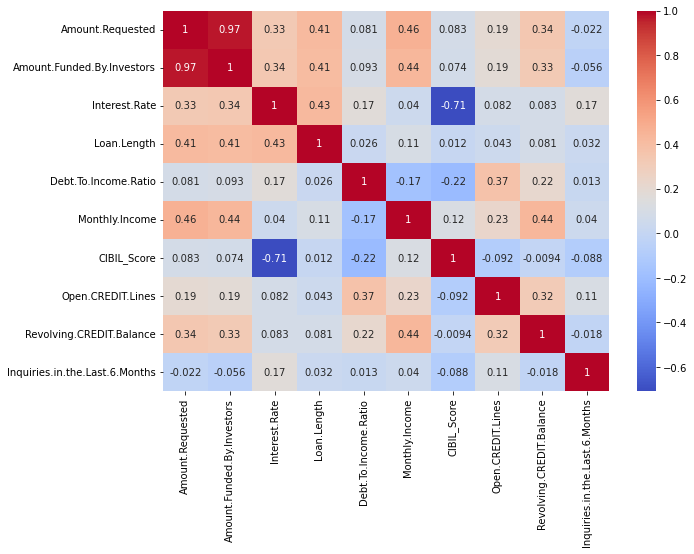

In [110]:
plt.figure(figsize = (10,7)) 
sns.heatmap(corr1, annot = True, cmap = 'coolwarm')

C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

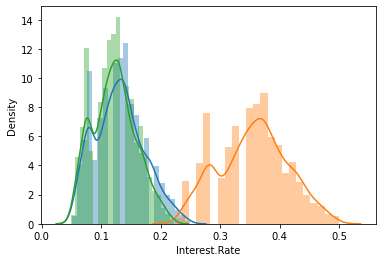

In [111]:
sns.distplot(loan['Interest.Rate']) # not normally distributed
sns.distplot(np.sqrt(loan['Interest.Rate']))
sns.distplot(np.log1p(loan['Interest.Rate']))
plt.show()

In [112]:
from scipy import stats
stats.shapiro(loan['Interest.Rate'])

ShapiroResult(statistic=0.9781493544578552, pvalue=4.2150497717257434e-19)

In [113]:
stats.shapiro(np.sqrt(loan['Interest.Rate']))

ShapiroResult(statistic=0.9834809303283691, pvalue=2.0254676674707437e-16)

In [114]:
stats.shapiro(np.log1p(loan['Interest.Rate']))

ShapiroResult(statistic=0.9804951548576355, pvalue=5.497909294483208e-18)

In [115]:
# Since data is not normally distributed, we will use Advanced Method - LR with SDG ( no assumption)

In [116]:
X = df_cleaned_dummy.drop(columns = ['Interest.Rate'])
y = df_cleaned_dummy['Interest.Rate']

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 8)

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train) # dont cheat - fit only on traning data

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test) # apply same transformation to test data

In [120]:
from sklearn.linear_model import SGDRegressor

In [121]:
sgd = SGDRegressor(max_iter = 10000, epsilon = 0.000001, loss = 'squared_loss') # (hyper parameters)
                    # no of times     # leatning rate     # (MSE, COST fn)

In [122]:
sgd.fit(X_train_std, y_train)

SGDRegressor(epsilon=1e-06, max_iter=10000)

In [123]:
sgd.score(X_train_std, y_train)

0.7667089976649484

In [124]:
sgd.score(X_test_std, y_test)

0.7604769837741812

In [125]:
def evaluate_reg(x,y,model) :
    x1 = x.copy()
    y1 = y.copy()
    predY = model.predict(x1)
    mse = np.mean((predY-y1)**2)
    rmse = np.sqrt(np.mean((predY-y1)**2))
    
    print(f'MSR {mse} ; RMSE {rmse}')

In [126]:
evaluate_reg(X_train_std, y_train, sgd)

MSR 0.0003979024283300292 ; RMSE 0.01994749178042265


In [127]:
evaluate_reg(X_test_std, y_test, sgd)

MSR 0.00038658116579098786 ; RMSE 0.01966166742143168


### Using VIF( Variance Inflation Factor)

In [128]:
df_cleaned_dummy.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Debt.To.Income.Ratio', 'Monthly.Income', 'CIBIL_Score',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Loan.Purpose_credit_card',
       'Loan.Purpose_debt_consolidation', 'Loan.Purpose_educational',
       'Loan.Purpose_home_improvement', 'Loan.Purpose_house',
       'Loan.Purpose_major_purchase', 'Loan.Purpose_medical',
       'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding', 'Home.Ownership_OTHER',
       'Home.Ownership_OWN', 'Home.Ownership_RENT'],
      dtype='object')

In [129]:
X = df_cleaned_dummy[['Amount.Requested',
      'Debt.To.Income.Ratio', 'Monthly.Income', 'CIBIL_Score',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Loan.Purpose_credit_card',
       'Loan.Purpose_debt_consolidation', 'Loan.Purpose_educational',
       'Loan.Purpose_home_improvement', 'Loan.Purpose_house',
       'Loan.Purpose_major_purchase', 'Loan.Purpose_medical',
       'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding', 'Home.Ownership_OTHER',
       'Home.Ownership_OWN', 'Home.Ownership_RENT']]

In [130]:
# VIF is used to diagnose multicollinearity in data
# high VIF implies high multicollinearity
# removing non-imp columns

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Var'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [132]:
vif_data.sort_values(by = ['VIF'], ascending = False)

,Var,VIF
3,CIBIL_Score,51.362851
8,Loan.Purpose_debt_consolidation,24.000585
7,Loan.Purpose_credit_card,8.809076
4,Open.CREDIT.Lines,8.419667
2,Monthly.Income,7.470612
1,Debt.To.Income.Ratio,7.139078
0,Amount.Requested,5.093112
15,Loan.Purpose_other,4.497094
10,Loan.Purpose_home_improvement,3.818285
5,Revolving.CREDIT.Balance,2.965173
